# 1. Time Series Data
Time series data is a type of data that is collected over time at regular intervals. It is a sequence of data points that are ordered chronologically and can be used to analyze trends, patterns, and behaviors over time. Time series data can be collected from a variety of sources, such as sensors, financial markets, weather stations, and social media platforms.

Examples of time series data include stock prices, temperature readings, website traffic, and sales data. Time series data can be analyzed using various statistical and machine learning techniques, such as regression analysis, ARIMA models, and deep learning models.

Time series data is often used in forecasting and prediction applications, where the goal is to predict future values based on past observations. Time series analysis can also be used to identify anomalies, trends, and seasonality in the data, which can provide insights into the underlying processes that generate the data.

Overall, time series data is an important type of data that is used in many different fields, including finance, economics, engineering, and social sciences. By analyzing time series data, researchers and practitioners can gain valuable insights into the behavior of complex systems and make informed decisions based on historical patterns and trends.

Time series data is a sequence of data points collected over time that can be used to analyze trends and patterns. It can be collected from various sources and analyzed using statistical and machine learning techniques.

Time series forecasting is the process of predicting future values based on past observations. Time series data is used in many different fields, including finance, economics, engineering, and social sciences.

# Stock Market Data scraping in Python

In [46]:
# pip install plotly
#%pip install scipy
# %pip install statsmodels

In [47]:
# imporot libraries
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import yfinance as yf
import datetime as dt
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.express as px

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [48]:
plt.figure(figsize=(15,6))

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

In [49]:
date.today()

datetime.date(2024, 6, 21)

In [50]:
# define the dates to fetch data
today = date.today()
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2
print("Your data will be between these dates: ", start_date,"and", end_date)

Your data will be between these dates:  2023-06-22 and 2024-06-21


In [51]:
# deifne the ticker
ticker = 'GOOGL'

df = yf.download(ticker, start=start_date, end=end_date, progress=False)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-22,120.000000,123.239998,118.830002,123.150002,123.008827,26952200
2023-06-23,121.379997,122.790001,121.059998,122.339996,122.199745,34885300
2023-06-26,120.760002,122.000000,118.269997,118.339996,118.204330,33969900
2023-06-27,117.080002,119.080002,116.099998,118.330002,118.194351,39535900
2023-06-28,117.089996,120.389999,116.849998,120.180000,120.042229,27091400


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-06-22 to 2024-06-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [53]:
df.insert(0, "Date", df.index, True)
# df["Date"] = df.index
df.reset_index(drop=True, inplace=True)

In [54]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-06-22,120.000000,123.239998,118.830002,123.150002,123.008827,26952200
1,2023-06-23,121.379997,122.790001,121.059998,122.339996,122.199745,34885300
2,2023-06-26,120.760002,122.000000,118.269997,118.339996,118.204330,33969900
3,2023-06-27,117.080002,119.080002,116.099998,118.330002,118.194351,39535900
4,2023-06-28,117.089996,120.389999,116.849998,120.180000,120.042229,27091400


In [55]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,251,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,2023-12-20 11:45:39.442231040,142.058486,143.550478,140.797450,142.259841,142.103197,2.879337e+07
min,2023-06-22 00:00:00,116.290001,117.709999,115.349998,116.449997,116.316498,1.251430e+07
25%,2023-09-20 12:00:00,131.380005,132.610001,129.975006,131.464996,131.314285,2.253375e+07
50%,2023-12-19 00:00:00,137.830002,139.100006,136.479996,137.960007,137.801849,2.622640e+07
75%,2024-03-20 12:00:00,150.050003,151.894997,149.259995,150.720001,150.547218,3.144115e+07
max,2024-06-20 00:00:00,178.250000,180.410004,176.110001,177.850006,177.789993,8.436620e+07
std,NaN,15.784179,15.849892,15.691459,15.840674,15.836425,1.067382e+07


In [56]:
# make a plot on plotly
fig = px.line(df, x='Date', y=df.columns, title='Stock Price')
fig.show()

In [57]:
# select columns
df = df[['Date', 'Close']]
df.head()

,Date,Close
0,2023-06-22,123.150002
1,2023-06-23,122.339996
2,2023-06-26,118.339996
3,2023-06-27,118.330002
4,2023-06-28,120.180000


In [58]:
# %pip install nbformat>=4.2.0

In [59]:
# plot the data to see how it looks like using plotly
fig = px.line(df, x='Date', y='Close', title='Google Stock Price')
fig.show()

In [60]:
# stationarity check on data
from statsmodels.tsa.stattools import adfuller
def adf_test(df):
    result=adfuller(df)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    if result[1] <= 0.05:
        print("Reject the null hypothesis. Data is stationary")
    else:
        print("Fail to reject the null hypothesis. Data is not stationary")

adf_test(df['Close'])

ADF Statistic: -0.607469
p-value: 0.869285
Fail to reject the null hypothesis. Data is not stationary


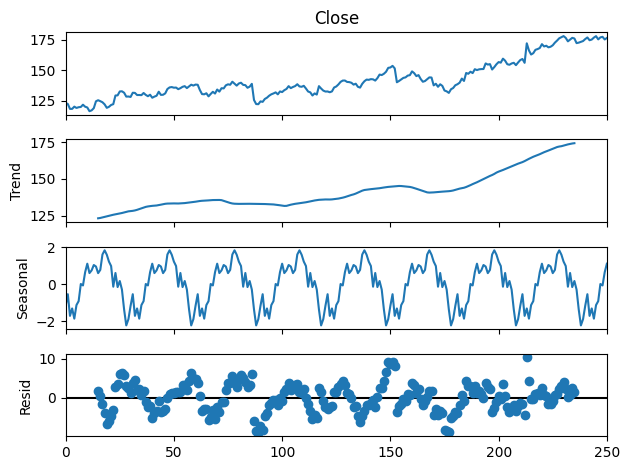

<Figure size 1500x600 with 0 Axes>

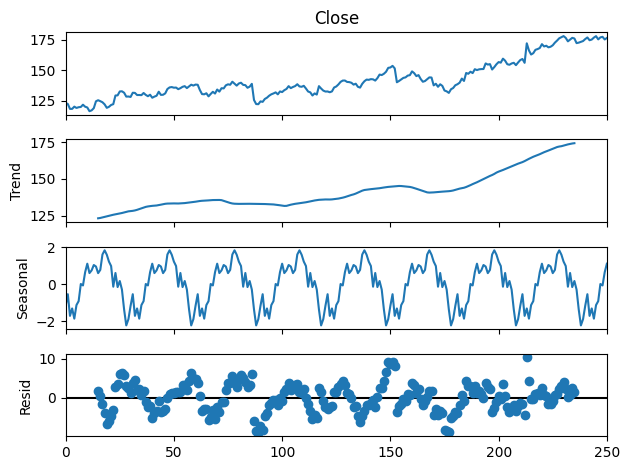

In [63]:
# set the size of figure
plt.figure(figsize=(15,6))

# decompose the data to see the trend, seasonality and noise
decompose=seasonal_decompose(df['Close'],model='additive',period=30)
decompose.plot()

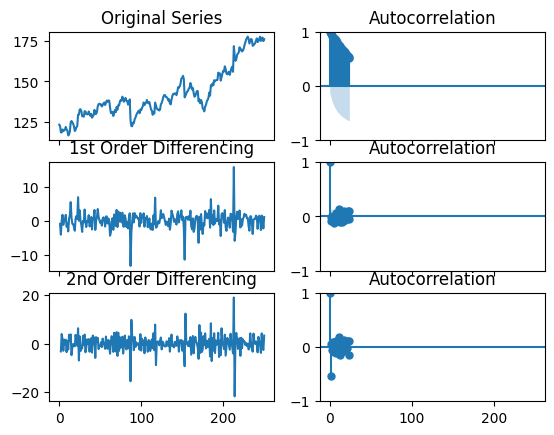

In [64]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df['Close']); axes[0, 0].set_title('Original Series')
plot_acf(df['Close'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df['Close'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df['Close'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df['Close'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df['Close'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

"d = 1"
# Lets find p value